In [10]:
import numpy as np
import matplotlib.pyplot as plt
#esta parte lee los datos entregados por perfil.cpp
def leer(name):
    ydata=[]
    xdata=[]
    f=open(name,"r")

    for i in range(40):
        list=f.readline().split()
        if(list[1]!='0'):
            xdata.append(float(list[0]))
            ydata.append(float(list[1]))
    return xdata,ydata

In [11]:
from scipy.optimize import curve_fit

def func(x,m,b):
    return m*x+b

def Rsqrt(xdata,ydata,popt):
    arr=np.array(xdata)
    residuals=ydata-func(arr,popt[0],popt[1])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    return 1 - (ss_res / ss_tot)

def fit(xi,xf,m0,b0):
    x=[i for i in xdata if(i>xi and i<xf)]
    y=[i for i in ydata if(xdata[ydata.index(i)]>xi and xdata[ydata.index(i)]<xf)]
    
    popt,pcov=curve_fit(func,x,y,p0=(m0,b0))
    m0=popt[0] 
    dm0=np.sqrt(pcov[0][0])
    b0=popt[1]
    db0=np.sqrt(pcov[1][1])
    
    R=Rsqrt(x,y,popt)
    
    return [m0,b0],R

def mid_point(xdata,ydata):
    mp=0
    m_p=[]
    Max=0
    for i in range(len(xdata)):
        if(ydata[i]>Max):
            Max=ydata[i]
            m_p=[]
        if(ydata[i]==Max):
            m_p.append(xdata[i])
    return sum(m_p)/len(m_p)

Recta izquierda: mid point= 76.7353
y= 0.39488136475407093 x+ 1.1990962365847417
θ₁= 0.37608598706712204
Recta derecha:
y= -0.3434980440273739 x+ 59.635550985814035
θ₂= 0.3308707291955426

Ángulo θ= 0.3534783581313323
μ= 0.3689753568284374  con una discrepacia del  7.756160792890654 %


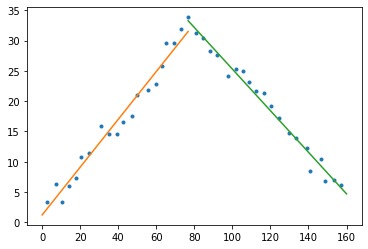

In [27]:
xdata,ydata=leer("perfil(seed1R).txt")
xm=mid_point(xdata,ydata)
xarr0=np.arange(0,xm,0.01)
xarr1=np.arange(xm,160,0.01)

[m0,b0],R0=fit(0,xm,0,0)[0],fit(0,xm,0,0)[1]
[m1,b1],R1=fit(xm,160,0,0)[0],fit(xm,160,0,0)[1]

print("Recta izquierda: mid point=",xm)
print("y=",m0,"x+",b0)
print("\u03B8\u2081=",np.arctan(m0))
print("Recta derecha:")
print("y=",m1,"x+",b1)
print("\u03B8\u2082=",-np.arctan(m1))
print()
theta=1/2*(np.arctan(m0)-np.arctan(m1))
print("Ángulo \u03B8=",theta)
mu=np.tan(theta)
dis=np.fabs(mu-0.4)/0.4*100
print("\u03BC=",mu," con una discrepacia del ",dis,"%")

plt.figure()
plt.plot(xdata,ydata,".")
plt.plot(xarr0,m0*xarr0+b0,"-")
plt.plot(xarr1,m1*xarr1+b1,"-")
plt.show()